In [ ]:
# Importe o pandas no ambiente python
import pandas as pd

# Create a DataFrame
# Carregamento do arquivo marketing.csv
marketing = pd.read_csv('marketing.csv', delimiter=',')


# Exibindo dados do DataFrame marketing


In [ ]:


# a) Imprima as primeiras 5 linhas do DataFrame marketing
# print(marketing.head(5)) 
marketing.head(5)


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [ ]:
# b) Imprima um resumo estatístico de todas as colunas do DataFrame marketing
#print(marketing.describe(include='all')) 
marketing.describe(include='all')

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [23]:

# 3. Imprima tipos de dados das colunas e a quantidade de valores não-nulos por coluna do DataFrame marketing
#print(marketing.info()) 
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


# Atualizando o tipo de dados de uma coluna

In [32]:
marketing['converted'].head(5)

0    True
1    True
2    True
3    True
4    True
Name: converted, dtype: object

In [37]:
marketing['converted'].dtype

dtype('bool')

In [38]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [36]:
marketing['converted'].astype('bool')
marketing['converted'] = marketing['converted'].astype('bool')

In [40]:
import numpy as np

marketing['is_house_ads'] = np.where(marketing['marketing_channel'] == 'House Ads', True, False)

In [41]:
marketing[['marketing_channel', 'is_house_ads']]

,marketing_channel,is_house_ads
0,House Ads,True
1,House Ads,True
2,House Ads,True
3,House Ads,True
4,House Ads,True
...,...,...
10032,Email,False
10033,Email,False
10034,Instagram,False
10035,Email,False


# Adicionando novas colunas

In [ ]:
# channel_dict = {
#     'House Ads': 1,
#     'Instagram': 2,
#     'Facebook': 3,
#     'Email': 4,
#     'Push': 5,
#     '': 0
# }

# # Retonar dados em float
# marketing['marketing_channel'].map(channel_dict)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
10032    4.0
10033    4.0
10034    2.0
10035    4.0
10036    3.0
Name: marketing_channel, Length: 10037, dtype: float64

In [ ]:
#a
channel_dict = {
    'House Ads': 1,
    'Instagram': 2,
    'Facebook': 3,
    'Email': 4,
    'Push': 5,
    '': 0
}

# Set na Values to default value
marketing['marketing_channel'].fillna('').map(channel_dict)

0        1
1        1
2        1
3        1
4        1
        ..
10032    4
10033    4
10034    2
10035    4
10036    3
Name: marketing_channel, Length: 10037, dtype: int64

In [ ]:
#b
import pandas as pd
import numpy as np

# Criação do DataFrame (substitua com seus dados)
dados = {
    'subscribing_channel': ['House Ads', 'Instagram', 'Facebook', 'Email', None],
    'language_preferred': ['Inglês', 'Espanhol', 'Francês', 'Inglês', 'Espanhol'],
    'language_displayed': ['Inglês', 'Inglês', 'Francês', 'Espanhol', 'Inglês']
}

# Criando o DataFrame
marketing = pd.DataFrame(dados)


# Adicionando a nova coluna is_correct_lang
marketing['is_correct_lang'] = np.where(
    marketing['language_preferred'] == marketing['language_displayed'], 
    'Yes', 
    'No'
)

# Exibir o DataFrame resultante
#rint(marketing)
marketing


,subscribing_channel,language_preferred,language_displayed,is_correct_lang
0,House Ads,Inglês,Inglês,Yes
1,Instagram,Espanhol,Inglês,No
2,Facebook,Francês,Francês,Yes
3,Email,Inglês,Espanhol,No
4,None,Espanhol,Inglês,No


# Colunas de data

In [34]:
# Import pandas no ambiente
import pandas as pd

# Importar marketing.csv com colunas de data
marketing = pd.read_csv('marketing.csv', 
                         parse_dates=['date_served', 'date_subscribed', 'date_canceled'])


#or
# marketing['date_served'] = pd.to_datetime(
#     marketing['date_served']
# )

#marketing['day_served'] = marketing['date_served'].dt.dayofweek

# Adicionar uma coluna DoW (Dia da Semana) a partir de 'date_subscribed'
marketing['DoW'] = marketing['date_subscribed'].dt.dayofweek


# Exibir o DataFrame resultante
#print(marketing)
marketing



C:\Users\Renata\AppData\Local\Temp\ipykernel_17264\1131679011.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',
C:\Users\Renata\AppData\Local\Temp\ipykernel_17264\1131679011.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',
C:\Users\Renata\AppData\Local\Temp\ipykernel_17264\1131679011.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  marketing = pd.read_csv('marketing.csv',


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,2.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,2.0


In [23]:
print(marketing.columns)


Index(['subscribing_channel', 'language_preferred', 'language_displayed',
       'is_correct_lang'],
      dtype='object')


# Alcance diário de marketing por canal

In [26]:
# Agrupar o DataFrame marketing por 'date_served' e contar o número de IDs de usuário únicos
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()

# Imprimir daily_users
print(daily_users)



date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


# Visualizando o alcance diário de marketing

In [28]:
pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/8.1 MB 3.1 MB/s eta 0:00:03
   --------- ------------------------------ 1.8/8.1 MB 3.1 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 2.9 MB/s eta 0:00:02
   -------------- ------------------------- 2.9/8.1 MB 2.7 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 2.5 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 2.5 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 2.2 MB/s eta 0:00:03
   ------------------- -------------------- 3.9/8.1 MB 2.0 MB/s eta 0:00:03
   -------------------- ------------------- 4.2/8.1 MB 2.0 MB/s eta 0:00:02
   ----------------------- ---------------- 4.7/8.1 MB 2.0 MB/s eta 0:00:02
   ------------------------ --------------- 5.0/8.1 MB 1.9 MB/s eta 0:00:02
   ----------------

Matplotlib is building the font cache; this may take a moment.


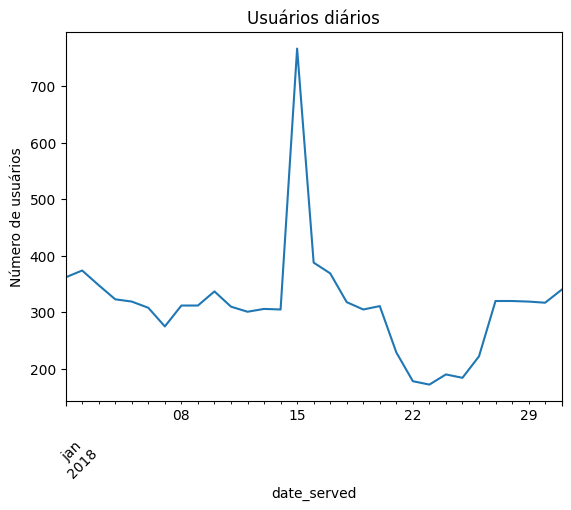

In [29]:
import matplotlib.pyplot as plt

# Plot daily_users
daily_users.plot()

# Include a title and y-axis label
plt.title('Usuários diários')
plt.ylabel('Número de usuários')

# Rotate the x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Display the plot
plt.show()
